# FAKE NEWS DETECTION USING NPL AND GloVe

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import itertools

IMPORTING THE DATASET

In [2]:
true = pd.read_csv("./True.csv")
false = pd.read_csv("./Fake.csv")

DATA VISUALIZATION AND PREPROCESSING

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# Making a new header in dataset for true and false news
true['category'] = 1
false['category'] = 0

In [6]:
# Merging the 2 dataset
df = pd.concat([true, false])

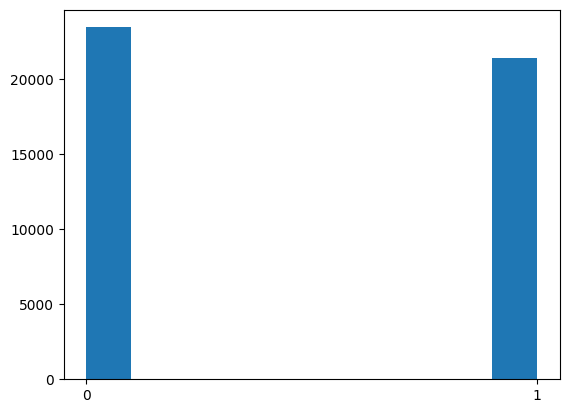

In [7]:
plt.hist(df.category)
plt.xticks([0, 1])
plt.show()

In [8]:
df.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
# checking for nan values
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [10]:
df.title.count()

44898

In [11]:
df.subject.value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [12]:
# Shuffling the dataset
df = df.sample(frac=1).reset_index(drop=True)

In [13]:
df.head()

,title,text,subject,date,category
0,Ireland says Brexit border breakthrough 'doabl...,DUBLIN (Reuters) - A breakthrough on the futur...,worldnews,"December 1, 2017",1
1,LAWLESS: OBAMA WON’T TAKE EXECUTIVE AMNESTY TO...,Why should Barack Obama bother with the courts...,politics,"May 28, 2015",0
2,Number of new refugees from Myanmar in Banglad...,YANGON (Reuters) - The number of refugees arri...,worldnews,"September 26, 2017",1
3,FEDS: Dozens of Muslim Girls had Genitals Muti...,Changing the name of something doesn t change ...,left-news,"Jun 7, 2017",0
4,Former head of Muslim Brotherhood dies in hosp...,CAIRO (Reuters) - The former leader of Egypt s...,worldnews,"September 22, 2017",1


In [14]:
df.shape

(44898, 5)

In [15]:
df['text'] = df['subject'] + df['title'] + df['text'] 
df.drop(columns=['title', 'subject', 'date'], inplace=True)

In [16]:
df.head()

,text,category
0,worldnewsIreland says Brexit border breakthrou...,1
1,politicsLAWLESS: OBAMA WON’T TAKE EXECUTIVE AM...,0
2,worldnewsNumber of new refugees from Myanmar i...,1
3,left-newsFEDS: Dozens of Muslim Girls had Geni...,0
4,worldnewsFormer head of Muslim Brotherhood die...,1


## DATA CLEANING

In [17]:
messages = df.copy()
messages.reset_index(inplace=True)

In [18]:
messages.head()

,index,text,category
0,0,worldnewsIreland says Brexit border breakthrou...,1
1,1,politicsLAWLESS: OBAMA WON’T TAKE EXECUTIVE AM...,0
2,2,worldnewsNumber of new refugees from Myanmar i...,1
3,3,left-newsFEDS: Dozens of Muslim Girls had Geni...,0
4,4,worldnewsFormer head of Muslim Brotherhood die...,1


In [19]:
messages['text'][4]

'worldnewsFormer head of Muslim Brotherhood dies in hospital: lawyerCAIRO (Reuters) - The former leader of Egypt s Muslim Brotherhood Islamist movement, Mohamed Akef, has died in a Cairo hospital after an illness, the group s lawyer said on Friday. Akef was  supreme guide  of the movement, as the leadership is known, until the end of 2009. He was among those detained in a crackdown after Egypt s elected president Mohamed Mursi, also of the Muslim Brotherhood, was ousted by the military in 2013. Akef s daughter announced his death on her Facebook page. The group s lawyer, Abdel Monem Abdel Maqsoud, told Reuters he had received a call from the prison service to report Akef s death in Cairo s Qasr El-Eyni hospital. President Abdel Fattah al-Sisi has engaged in the toughest crackdown on Islamists in Egypt s modern history since toppling Mursi when Sisi was still head of the armed forces. He was later elected president. Sisi presents himself as a bulwark against militant extremism as Egypt 

In [20]:
messages['text'][44894]

'News Mike Pence Indicates That He’ll Soon Be In The Russian Hot SeatThere has been a lot of social media speculation over what will happen if and when Donald Trump is impeached or he is forced to resign. The Constitution, obviously, says that Mike Pence will be made President. Pence, it s assumed, will be a slightly better alternative. While he s anti-LGBT and anti-woman enough to be the inspiration for the Handmaid s Tale, he appears to be just bland enough to be called sane.Not so fast. He might be sane, but if his latest move is any indication, he could be going down with Trump and the rest of the people who are in bed with Russia. He has hired his own lawyer for the apparent inevitability of appearing under oath.The vice president s office said Thursday that Pence has retained Richard Cullen, a Richmond-based lawyer and chairman of McGuireWoods who previously served as a U.S. attorney in the Eastern District of Virginia.Pence s decision comes less than a month after Trump hired hi

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
corpus= []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()
    
    all_stopwords = set(stopwords.words('english'))
    words_to_remove = [
        'not', 'no', 'never', 'none',
        'news', 'article', 'story', 'report', 'information', 'source', 'publication',
        'very', 'much', 'many', 'more', 'most', 'some', 'few',
        'and', 'but', 'or', 'for', 'with', 'by', 'from', 'in', 'on', 'at',
        'said', 'told', 'according', 'states', 'claimed', 'alleges',
        'according to', 'as reported by', 'in response to', 'based on',
        'today', 'yesterday', 'tomorrow', 'now', 'recently', 'currently'
    ]
    all_stopwords = all_stopwords - set(words_to_remove)

    review = [ps.stem(word) for word in review if not word in all_stopwords]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aman9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
corpus[4]

'worldnewsform head muslim brotherhood die in hospit lawyercairo reuter former leader egypt muslim brotherhood islamist movement moham akef die in cairo hospit ill group lawyer said on friday akef suprem guid movement leadership known end among detain in crackdown egypt elect presid moham mursi also muslim brotherhood oust by militari in akef daughter announc death on facebook page group lawyer abdel monem abdel maqsoud told reuter receiv call from prison servic report akef death in cairo qasr el eyni hospit presid abdel fattah al sisi engag in toughest crackdown on islamist in egypt modern histori sinc toppl mursi sisi still head arm forc later elect presid sisi present bulwark milit extrem egypt battl islamist insurg in northern sinai but come attack from right group say time in power seen worst crackdown in histori'

In [23]:
corpus[44894]

'news mike penc indic soon in russian hot seatther lot social media specul happen and donald trump impeach or forc resign constitut obvious say mike penc made presid penc assum slightli better altern anti lgbt and anti woman enough inspir for handmaid tale appear bland enough call sane not fast might sane but latest move indic could go with trump and rest peopl in bed with russia hire lawyer for appar inevit appear oath vice presid offic said thursday penc retain richard cullen richmond base lawyer and chairman mcguirewood previous serv u attorney in eastern district virginia penc decis come less month trump hire privat attorney marc e kasowitz help navig investig relat russia probe and day washington post report special counsel robert mueller iii widen investig examin whether presid attempt obstruct justic sourc washington postof cours act hire lawyer in no way mean penc guilti know though penc knew from at least march trump fire nation secur advisor gener michael flynn lobbi for turk

BAG OF WORDS

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
cv = CountVectorizer(max_features=14000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [61]:
X.shape

(44898, 14000)

In [66]:
cv.vocabulary_

{'say': 10997,
 'brexit': 1840,
 'border': 1784,
 'breakthrough': 1834,
 'by': 1994,
 'decemb': 3269,
 'reuter': 10528,
 'on': 8709,
 'futur': 5079,
 'irish': 6639,
 'britain': 1858,
 'leav': 7151,
 'european': 4059,
 'union': 13004,
 'key': 6895,
 'eu': 4050,
 'summit': 12045,
 'in': 5885,
 'two': 12903,
 'week': 13448,
 'time': 12465,
 'but': 1943,
 'negoti': 8186,
 'team': 12272,
 'not': 8410,
 'yet': 13953,
 'ireland': 6638,
 'foreign': 4784,
 'minist': 7816,
 'said': 10798,
 'friday': 4939,
 'avoid': 1422,
 'call': 2121,
 'hard': 5444,
 'island': 6662,
 'last': 7026,
 'major': 7451,
 'hurdl': 5766,
 'talk': 12211,
 'move': 8017,
 'trade': 12578,
 'relationship': 10296,
 'with': 13595,
 'and': 403,
 'possibl': 9641,
 'year': 13909,
 'transit': 12608,
 'deal': 3227,
 'council': 2963,
 'presid': 9710,
 'donald': 3657,
 'tusk': 12882,
 'set': 11282,
 'absolut': 26,
 'deadlin': 3224,
 'monday': 7906,
 'british': 1861,
 'prime': 9822,
 'theresa': 12376,
 'may': 7601,
 'meet': 7662,
 'ch

In [67]:
y = messages['category']

FREQUENT REAL WORDS

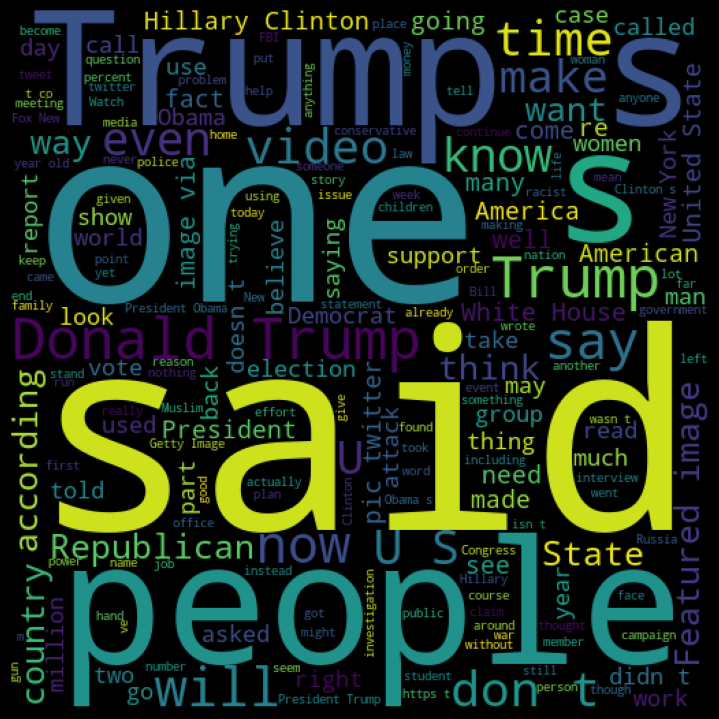

In [68]:
real = ' '.join(list(messages[messages['category']==0]['text']))
real = WordCloud(width=512, height=512).generate(real)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

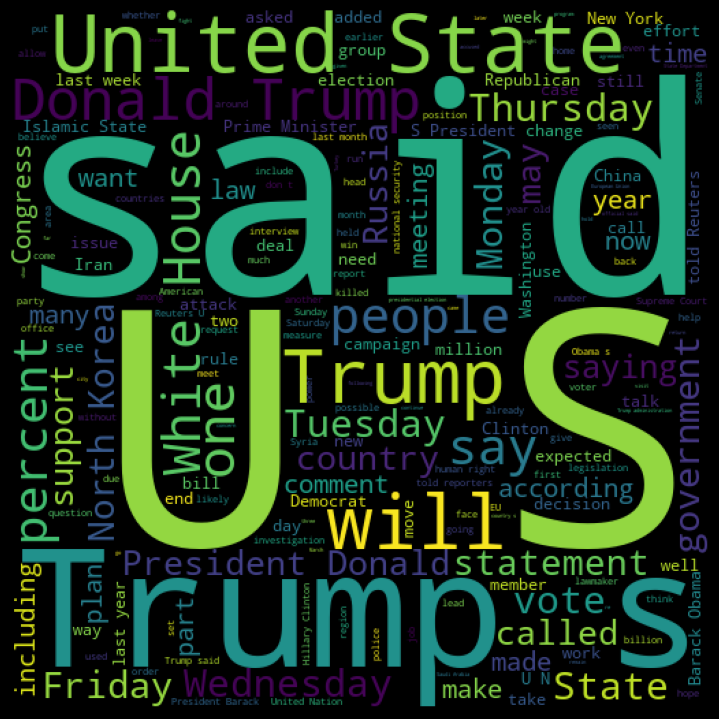

In [70]:
fake = ' '.join(list(messages[messages['category']==1]['text']))
fake = WordCloud(width=512, height=512).generate(fake)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(fake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

SPLITTING THE DATASET IN TEST AND TRANING SET

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=0)

In [72]:
cv.get_feature_names_out()[:500]

array(['aaron', 'abadi', 'abandon', 'abba', 'abbott', 'abc', 'abc news',
       'abc week', 'abdel', 'abduct', 'abdullah', 'abe', 'abedin', 'abid',
       'abid by', 'abil', 'abl', 'abl get', 'aboard', 'abolish', 'abort',
       'abort and', 'abroad', 'abruptli', 'absenc', 'absent', 'absolut',
       'absolut no', 'absolut noth', 'absurd', 'abu', 'abus', 'abus and',
       'abus power', 'aca', 'academ', 'academi', 'acceler', 'accept',
       'access', 'accid', 'accident', 'accommod', 'accompani',
       'accompani by', 'accomplish', 'accord', 'accord court',
       'accord document', 'accord new', 'accord new york',
       'accord offici', 'accord polic', 'accord report', 'accord reuter',
       'accord reuter ipso', 'accord sourc', 'accord state',
       'accord statement', 'accord washington', 'accord with', 'account',
       'account and', 'account for', 'accur', 'accuraci', 'accus',
       'accus by', 'accus presid', 'accus sexual', 'accus trump',
       'achiev', 'acknowledg', 'ac

In [73]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 14000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [74]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [75]:
count_df.head()

,aaron,abadi,abandon,abba,abbott,abc,abc news,abc week,abdel,abduct,...,zika,zika viru,zimbabw,zimbabwean,zink,zone,zone in,zor,zuckerberg,zuma
0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


FUNCTION FOR PRINTS AND PLOTING OF CONFUSION MATRIX

In [76]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

MultinomialNB Algorithm

In [77]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [78]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

accuracy:   0.969
Confusion matrix, without normalization


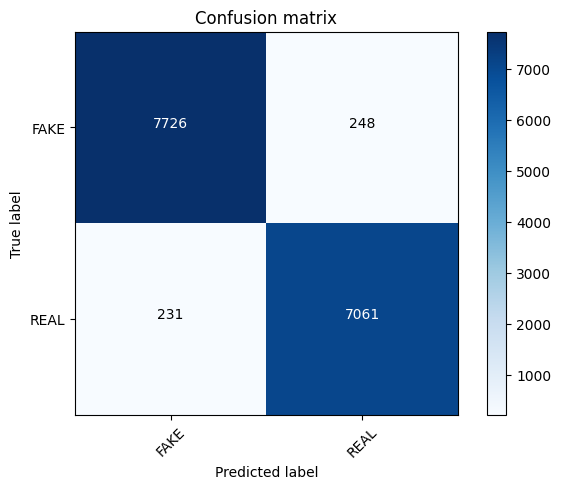

In [79]:
from sklearn import metrics
MultinomialNBModel = classifier.fit(X_train, y_train)
pred = MultinomialNBModel.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [80]:
import joblib

joblib.dump(MultinomialNBModel, 'test_model.pkl')

['test_model.pkl']

In [54]:
joblib.dump(cv, 'countVectorizer_model.pkl')

['countVectorizer_model.pkl']